## Importation of the key python libraries 

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
mape = 179633.90405092994
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings

## Loading the dataset

In [16]:
# Load the dataset
data = pd.read_csv(r'C:\Users\k043012m\OneDrive - Staffordshire University\Precious Dissertation\03 Final Report\amazon_sales_dataset.csv')

## Checking for Missing Values 

In [17]:
#checking for missing values
missing_values = data.isnull().sum()
missing_values

Date              0
Store             0
Dept              0
Weekly_Sales      0
Type              0
Size              0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
IsHoliday         0
Year              0
Month             0
Week              0
max               0
min               0
mean              0
median            0
std               0
Total_MarkDown    0
dtype: int64

# Feature Selection 

## Exploratory Data Analysis

In [18]:
#loading dataset
data = pd.read_csv(r'C:\Users\k043012m\OneDrive - Staffordshire University\Precious Dissertation\03 Final Report\amazon_sales_dataset.csv')
# Simplifying the dataset for this example - select relevant features and a single store (e.g., Store 1)
extracted_data = data[data['Store'] == 1][['Date', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]


In [20]:
# Suppress specific FutureWarnings from pandas that are raised by seaborn
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.')


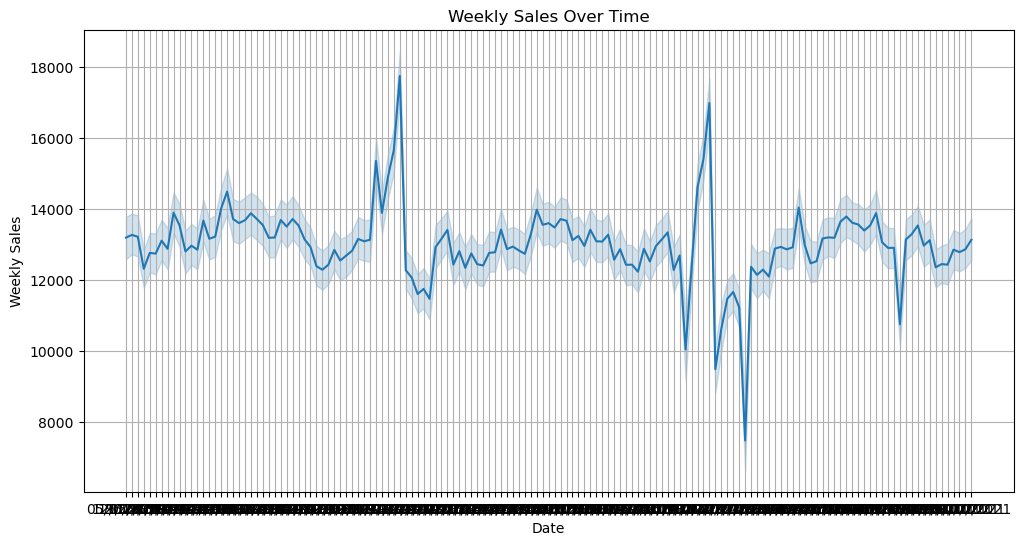

In [21]:
# Exploratory Data Analysis: Plotting sales trends and correlation matrix
plt.figure(figsize=(12, 6))
plt.title('Weekly Sales Over Time')
sns.lineplot(data=data, x='Date', y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

## Histogram showing the temperature and its frequency

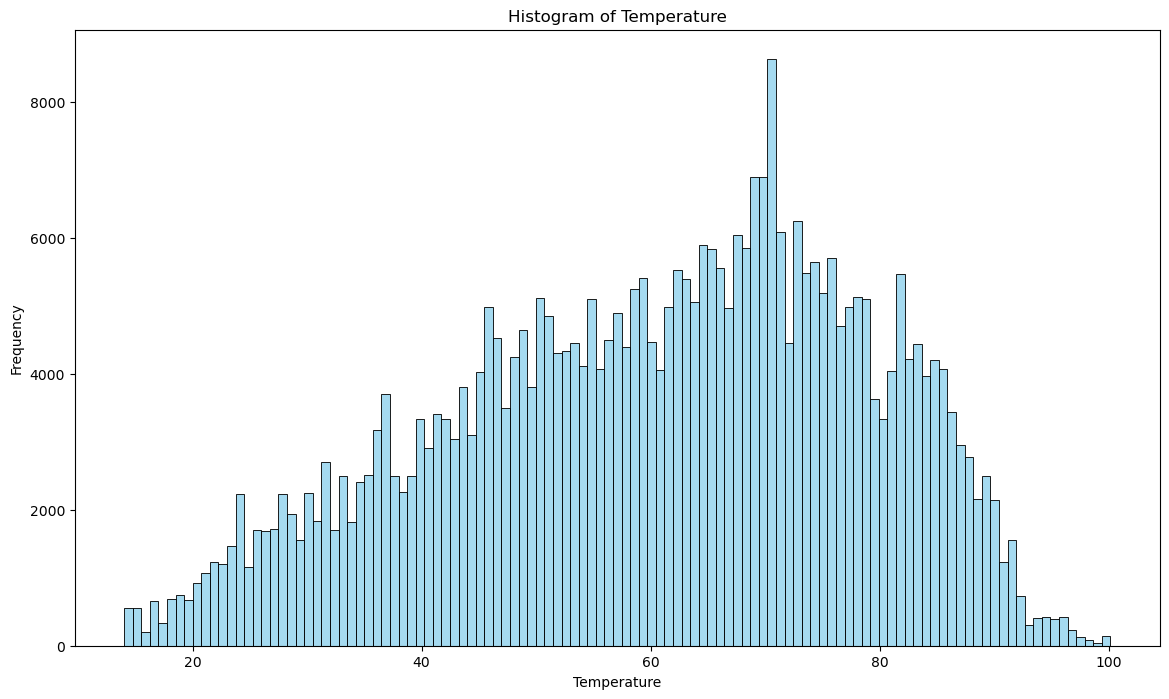

In [27]:
plt.figure(figsize=(14, 8))
sns.histplot( data['Temperature'], kde=False, color='skyblue')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## The Correlation Matrix

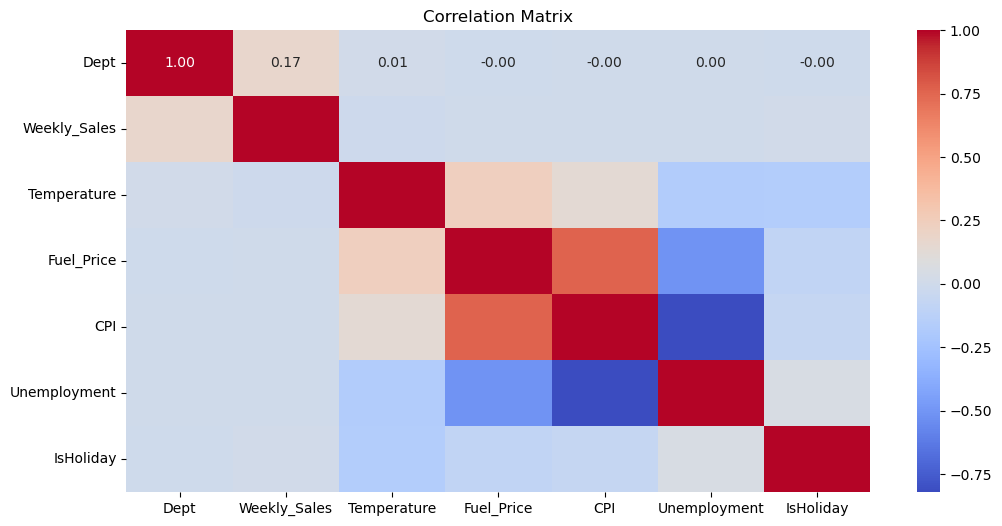

In [25]:
corr_data = extracted_data.drop(columns=[data.columns[0]], axis= 1)
correlation_matrix = corr_data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Model selection, training and integration

In [28]:
# Assuming 'Weekly_Sales' is the target and dropping any non-relevant or non-numeric columns for simplicity
X = data.drop(['Weekly_Sales', 'Date'], axis=1)  # Example columns to drop
y = data['Weekly_Sales']

# Preprocess the dataset
# Define numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define base learners
estimators = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=10, random_state=42)),
    ('lr', LinearRegression())
]

# Define the stacking ensemble
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5)

# Create a pipeline that first preprocesses the data, then fits the stacking model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', stacking_regressor)])

# Train the stacking ensemble
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 2356.8489942966135


## Cross Validation

In [29]:
# Create a pipeline that first preprocesses the data, then fits the stacking model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', stacking_regressor)])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cross_val_score = np.mean(cross_val_scores)
std_cross_val_score = np.std(cross_val_scores)

mean_cross_val_score, std_cross_val_score


(-8941346.227147583, 3262661.500292089)

## Evaluating Model Performance: RMSE, MAE, MSE, and MAPE Metrics

In [47]:
# Predictions using the test set
y_pred = pipeline.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# MAPE - Ensure there are no zero values in y_test to avoid division by zero errors

mape_ = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape/10000}')


RMSE: 2356.8489942966135
MAE: 1196.6638398016669
MSE: 5554737.181916958
MAPE: 17.963390405092994
